In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides_data = pd.DataFrame({
    "id": [34, 42, 56, 59, 61],
    "date": ["3/2/07", "3/22/07", "4/6/07", "4/14/07", "4/15/07"],
    "time": ["Night", None, None, None, None],
    "continent_code": [None, None, None, None, None],
    "country_name": ["United States", None, None, "Canada", None],
    "country_code": ["US", "US", "US", "CA", "US"],
    "state/province": ["Virginia", "Ohio", "Pennsylvania", "Quebec", "Kentucky"],
    "population": [16000, 17288, 15930, 42786, 6903],
    "city/town": ["Cherry Hill", "New Philadelphia", "Wilkinsburg", "Châteauguay", "Pikeville"],
    "distance": [3.40765, 3.33522, 2.91977, 2.98682, 5.66542],
    # skipping ... columns for brevity, include others as needed
    "geolocation": [
        (38.600900000000003, -77.268199999999993),
        (40.517499999999998, -81.430499999999995),
        (40.4377, -79.915999999999997),
        (45.322600000000001, -73.777100000000004),
        (37.432499999999997, -82.493099999999998)
    ],
    "hazard_type": ["Landslide", "Landslide", "Landslide", "Landslide", "Landslide"],
    "landslide_type": ["Landslide", "Landslide", "Landslide", "Riverbank collapse", "Landslide"],
    "landslide_size": ["Small", "Small", "Small", "Small", "Small"],
    "trigger": ["Rain", "Rain", "Rain", "Rain", "Downpour"],
    "storm_name": [None, None, None, None, None],
    "injuries": [None, None, None, None, None],
    "fatalities": [None, None, None, None, 0.0],
    "source_name": [
        "NBC 4 news",
        "Canton Rep.com",
        "The Pittsburgh Channel.com",
        "Le Soleil",
        "Matthew Crawford (KGS)"
    ],
    "source_link": [
        "http://www.nbc4.com/news/11186871/detail.html",
        "http://www.cantonrep.com/index.php?ID=345054&C...",
        "https://web.archive.org/web/20080423132842/htt...",
        "http://www.hebdos.net/lsc/edition162007/articl...",
        None
    ]
})


# set seed for reproducibility
np.random.seed(0)

# Parsing Dates


In [4]:
landslides_data.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,None,United States,US,Virginia,16000,Cherry Hill,3.40765,"(38.6009, -77.2682)",Landslide,Landslide,Small,Rain,None,None,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,None,None,None,US,Ohio,17288,New Philadelphia,3.33522,"(40.5175, -81.4305)",Landslide,Landslide,Small,Rain,None,None,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,None,None,None,US,Pennsylvania,15930,Wilkinsburg,2.91977,"(40.4377, -79.916)",Landslide,Landslide,Small,Rain,None,None,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,None,None,Canada,CA,Quebec,42786,Châteauguay,2.98682,"(45.3226, -73.7771)",Landslide,Riverbank collapse,Small,Rain,None,None,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,None,None,None,US,Kentucky,6903,Pikeville,5.66542,"(37.4325, -82.4931)",Landslide,Landslide,Small,Downpour,None,None,0.0,Matthew Crawford (KGS),None


We'll be working with the "date" column from the landslides dataframe. Let's make sure it actually looks like it contains dates.

In [3]:
landslides_data["date"]

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that at the bottom of the output of head(), you can see that it says that the data type of this column is "object".

Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

If you check the pandas dtype documentation, you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.

# Convert our date columns to datetime
Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can determine what the format of our dates are with a guide called "strftime directive". The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

Some examples:

1/17/07 has the format "%m/%d/%y"
17-1-2007 has the format "%d-%m-%Y"
Looking back up at the head of the "date" column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates:

In [12]:
landslides_data["date_parsed"] =  pd.to_datetime(landslides_data['date'], format="%m/%d/%y")
landslides_data["date_parsed"].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

# Select the day of the month
Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [8]:
day_of_the_month = landslides_data["date_parsed"].dt.day 
day_of_the_month

0     2
1    22
2     6
3    14
4    15
Name: date_parsed, dtype: int32

If we tried to get the same information from the original "date" column, we would get an error: AttributeError: Can only use .dt accessor with datetimelike values. This is because dt.day doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, we have to parse them before we can interact with them in a useful way.

# Plot the day of the month to check the date parsing
One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

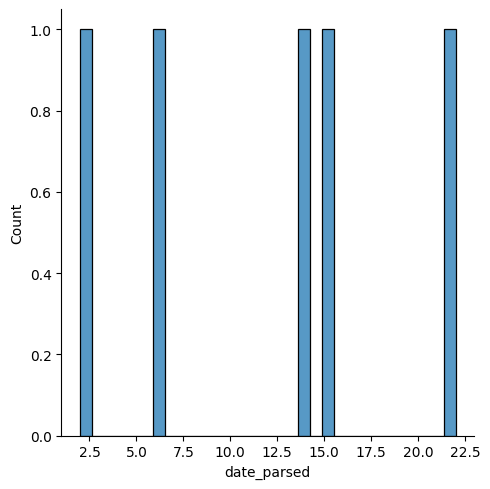

In [10]:
sns.displot(day_of_the_month, kde = False, bins = 31)